In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Sales Data

In [2]:
# Read the sales data
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m12/lesson_1/datasets/sales.csv"
df_sales = pd.read_csv(file_path)

# Display sample data
df_sales.head()

,ads,sales
0,21,8350
1,180,22820
2,50,12950
3,195,21105
4,96,15008


<Axes: title={'center': 'Sales per Number of Ads'}, xlabel='ads', ylabel='sales'>

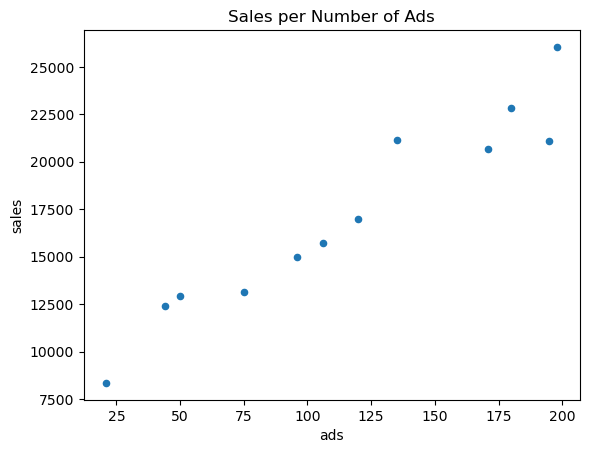

In [3]:
# Create a scatter plot with the sales information
sales_plot = df_sales.plot.scatter(
    x="ads",
    y="sales",
    title="Sales per Number of Ads"
)
sales_plot

## Prepare the Data to Fit the Linear Regression Model

In [5]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = df_sales['ads'].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[ 21],
       [180],
       [ 50],
       [195],
       [ 96]])

In [6]:
# Create an array for the dependent variable y with the sales data
y = df_sales['sales']

## Build the Linear Regression Model

In [7]:
# Create a model with scikit-learn
model = LinearRegression()

In [8]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [9]:
# Display the slope
print(f"slope: {model.coef_}")

slope: [81.34898394]


In [10]:
# Display the y-intercept
print(f"y-intercept: {model.intercept_}")

y-intercept: 7764.796945240409


In [13]:
# Display the model's best fit line formula
print(f"formula: y = {model.intercept_} + {model.coef_[0]:.2f}X")

formula: y = 7764.796945240409 + 81.35X


## Plot the Best Fit Line for the Sales Prediction Model

In [16]:
# Make predictions using the X set
preds = model.predict(X)

In [17]:
# Create a copy of the original data
df_sales_preds = df_sales.copy()

# Add a column with the predicted sales values
df_sales_preds['sales_predictions'] = preds

# Display sample data
df_sales_preds.head()

,ads,sales,sales_predictions
0,21,8350,9473.125608
1,180,22820,22407.614054
2,50,12950,11832.246142
3,195,21105,23627.848813
4,96,15008,15574.299403


<Axes: xlabel='ads'>

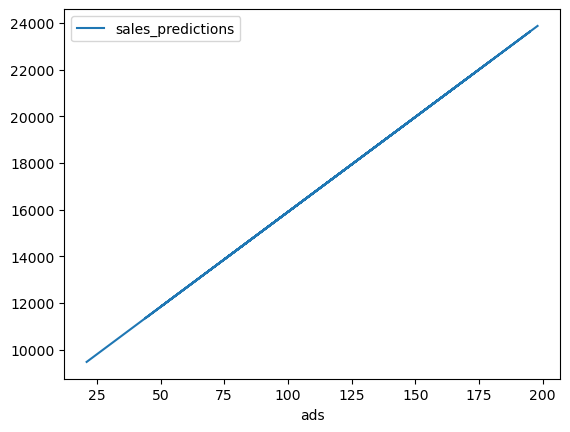

In [18]:
# Create a line plot of the predicted salary values
df_sales_preds.plot(kind='line', x='ads', y='sales_predictions')

<Axes: xlabel='ads', ylabel='sales'>

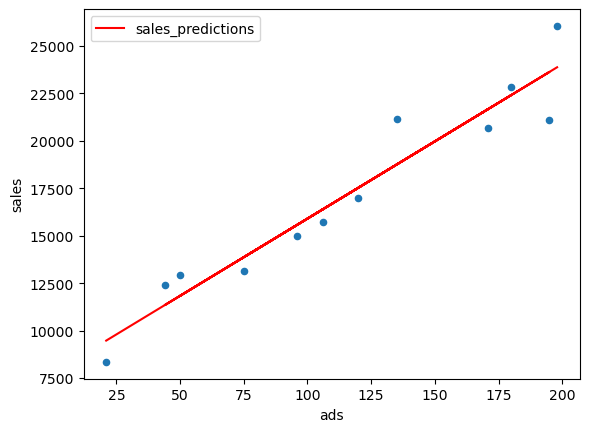

In [22]:
# Superpose the original data and the best fit line
# Create a scatter plot with the sales information
sales_plot = df_sales_preds.plot(kind='scatter', x='ads', y='sales')
fitline = df_sales_preds.plot(kind='line', x='ads', y='sales_predictions', color='red', ax=sales_plot)
sales_plot

## Make Manual Predictions

In [25]:
# Display the formula to predict the sales with 100 ads
print(f"formula: y = {model.intercept_} + {model.coef_[0]}*100")

# Predict the sales with 100 ads
single_pred = model.intercept_ + model.coef_[0]*100

# Display the prediction
print(f'Prediction sales for 100 ads: ${single_pred:.2f}')

formula: y = 7764.796945240409 + 81.34898393753781*100
Prediction sales for 100 ads: $15899.70


## Make Predictions Using the `predict` Function

In [27]:
X

array([100, 150, 200, 250, 300])

In [26]:
# Create an array to predict sales for 100, 150, 200, 250, and 300 ads
X = np.array([100, 150, 200, 250, 300])

# Format the array as a one-column array
X_ads = X.reshape(-1, 1)

# Display sample data
X_ads

array([[100],
       [150],
       [200],
       [250],
       [300]])

In [29]:
# Predict sales for 100, 150, 200, 250, and 300 ads
sales_pred = model.predict(X_ads)

In [30]:
# Create a DataFrame for the predicted sales
pred_sales = pd.DataFrame({'ads' : X, "pred_sales" : sales_pred})

# Display data
pred_sales

,ads,pred_sales
0,100,15899.695339
1,150,19967.144536
2,200,24034.593733
3,250,28102.042930
4,300,32169.492127
